In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

data, labels = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=None)
plt.scatter(data.T[0],data.T[1])

In [ ]:
# Divide training test
from sklearn import model_selection
data_train, data_test, labels_train, labels_test =  model_selection.train_test_split(data, labels, test_size=.5, train_size=.5, random_state=None, shuffle=True, stratify=None)
plt.scatter(data_train.T[0], data_train.T[1], c = labels_train)

In [ ]:
# Growing Spheres:
from scipy.special import gammainc
from matplotlib import pyplot as plt


def GrowingSpheres(clf, observation, m, n, dimensions):
    stop = False
    x_pred = clf.predict([observation]) # in {-1, 1}
    while not stop:
        z = GenerateOnSL(observation, 0, m, n, dimensions)
        z_pred = clf.predict(z)
        stop = all(x_pred == z_unit for z_unit in z_pred)
        m = m/2
    a_0 = m
    a_1 = 2*m
    stop = False
    while all(z_unit == x_pred for z_unit in z_pred):
        z = GenerateOnSL(observation, a_0, a_1, n, dimensions)
        z_pred = clf.predict(z)
        a_0 = a_1
        a_1 = a_1 + m
    norm_distances = [np.linalg.norm(observation -z[i]) if z_pred[i] != x_pred else 0 for i in range(len(z_pred))]
    return z[np.argmax(norm_distances)]
    
def GenerateOnSL(center, minR, maxR, nbSamples, dimensions):
    # we obtain r varying between minR and maxR
    R = np.random.uniform(minR, maxR, size = nbSamples)
    points = []
    x = np.random.normal(scale=1,size=(nbSamples, dimensions))
    x_norm = [x[i]/ np.linalg.norm(x, axis = 1)[i] for i in range(x.shape[0])]
    for i, x_point in enumerate(x_norm):
        r = np.random.uniform(minR,maxR)
        points.append(x_point * R[i] + center )
    return np.array(points)

In [ ]:
from mlxtend.plotting import plot_decision_regions

def plotEverything(X,Y,classifier,title, obs, enemies, labels):

    plot_decision_regions(X, Y, clf=classifier, legend=2)
    
    plt.scatter(obs[0], obs[1], c = 'lime',marker= 'x')
    for i, enemy in enumerate(enemies): 
        plt.scatter(enemy.T[0], enemy.T[1], marker = '*')
        plt.annotate(labels[i], (enemy.T[0], enemy.T[1]))
    # Adding axes annotations
    plt.title(title)
    plt.show()

In [ ]:
seed = 123456

In [ ]:
from sklearn import svm
obs = [0,0]
svmClassifier = svm.SVC()
svmClassifier.fit(data_train, labels_train)
prediction = svmClassifier.predict(data_test)
enemies = []
labels = []
ran = np.arange(1, 11, 2)/2
n_list = np.arange(10,101,30)
for i in range(len(ran)):
    for j in range(len(n_list)):
        print(i)
        enemy = GrowingSpheres(svmClassifier, obs, ran[i], n_list[j])
        enemies.append(enemy)
        labels.append("m = " + str(ran[i]) +", n = "+ str(n_list[j]))
plotEverything(data_test,prediction,svmClassifier,'SVM', obs, enemies, labels)

In [232]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
breast_cancer = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'], breast_cancer['target'], train_size=0.75, random_state = 1234)


In [166]:

obs = X_test[0]
svmClassifier = svm.SVC()
svmClassifier.fit(X_train, y_train)
prediction = svmClassifier.predict(X_test)


In [167]:
from tqdm import tqdm
dist = np.zeros_like(obs)
best_norm = np.Inf
for i in tqdm(range(20)):
    enemy = GrowingSpheres(svmClassifier, obs, 0.5, 50, 30)
    dist += obs - enemy
    norm = np.linalg.norm(obs - enemy)
    if norm < best_norm:
        best_norm = norm
        best_enemy = enemy
dist = dist / 20

100%|██████████| 20/20 [01:15<00:00,  3.80s/it]


In [168]:
print(dist)
obsprediction = svmClassifier.predict(obs.reshape(1, -1))
enemyprediction = svmClassifier.predict(best_enemy.reshape(1, -1))
feature_names = breast_cancer['feature_names']
target_names = breast_cancer['target_names']
print(feature_names)
print(target_names)

ind = np.arange(len(obs))


def ylabeldata(ind, data, labels, title):
    fig, ax = plt.subplots()
    p1 = ax.barh(ind, data, label='Men')
    ax.set_title(title)
    ax.set_yticks(ind, labels=labels)

[  12.33681739  -31.8381596    -0.44514968   61.75079882  -16.99835419
   -3.73197047   22.04576397  -24.0597711    -3.1691624    -8.42026586
  -29.71491991   23.15464192   -5.21793937  -48.17996759   -4.43016217
   -7.44357838   -7.13395994    9.69668465   38.74011861   14.22626338
   15.77258001  -30.02895831  -16.57865725 -301.38657596   -6.72334103
    5.22829924   17.97585069    0.36720847   37.23088499   27.09198412]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'beni

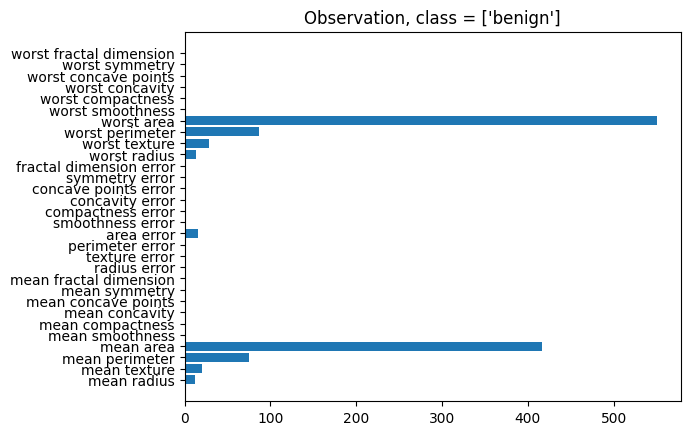

In [169]:

ylabeldata(ind, obs, feature_names, "Observation, class = " + str(target_names[obsprediction]))

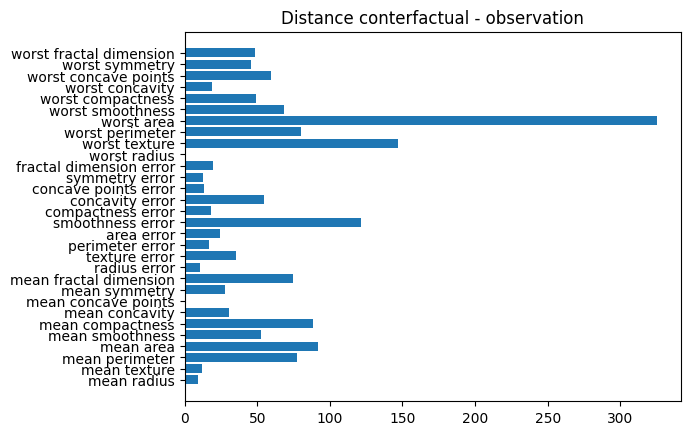

In [171]:
dist1 = obs - best_enemy
ylabeldata(ind, np.abs(dist1), feature_names, "Distance conterfactual - observation")

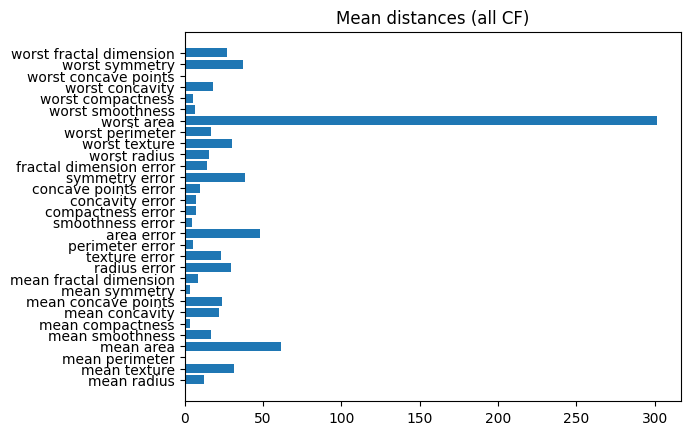

In [172]:
ylabeldata(ind,  np.abs(dist), feature_names, "Mean distances (all CF)")

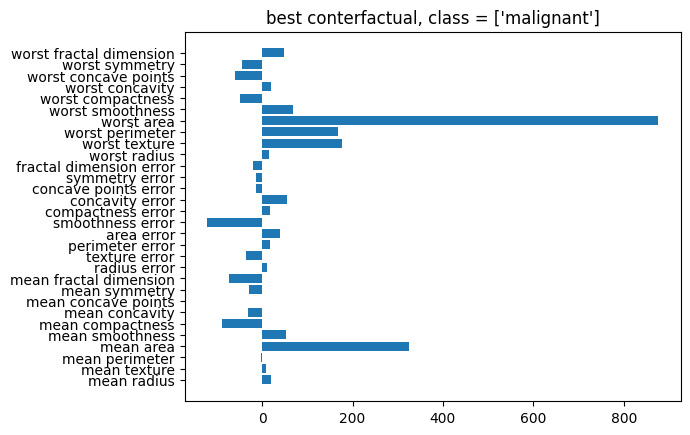

In [173]:
ylabeldata(ind, best_enemy, feature_names, "best conterfactual, class = " + str(target_names[enemyprediction]))

In [174]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer(as_frame= True)



data = breast_cancer['data']
target = breast_cancer['target']
#x_normed = data / np.linalg.norm(data, axis=0)
x_normed = breast_cancer['data']

print(target)


X_train, X_test, y_train, y_test = train_test_split(x_normed, breast_cancer['target'], train_size=0.75, random_state = 1234)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [175]:
print(list(feature_names))

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [176]:
import dice_ml
data['target'] = target
data_dice = dice_ml.Data(dataframe=data, continuous_features = list(feature_names), outcome_name='target')

In [177]:
print(X_test.iloc[[0]])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
531        11.67         20.02           75.21      416.2           0.1016   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
531           0.09453           0.042              0.02157         0.1859   

     mean fractal dimension  ...  worst radius  worst texture  \
531                 0.06461  ...         13.35          28.81   

     worst perimeter  worst area  worst smoothness  worst compactness  \
531             87.0       550.6             0.155             0.2964   

     worst concavity  worst concave points  worst symmetry  \
531           0.2758                0.0812          0.3206   

     worst fractal dimension  
531                   0.0895  

[1 rows x 30 columns]


In [183]:
from sklearn.ensemble import RandomForestClassifier
obs2 = X_test.iloc[[0]]

rfClassifier = RandomForestClassifier()
fittedRF = rfClassifier.fit(X_train, y_train)
prediction = rfClassifier.predict(X_test)
# Using sklearn backend
m = dice_ml.Model(model= fittedRF, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(data_dice, m, method= 'random')


In [221]:
counterfactuals = exp.generate_counterfactuals(
                    query_instances=obs2, total_CFs=20, proximity_weight=0.1,desired_class='opposite')
counterfactuals.visualize_as_dataframe()

100%|██████████| 1/1 [01:51<00:00, 111.98s/it]

Query instance (original outcome : 1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.67,20.02,75.209999,416.200012,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.809999,87.0,550.599976,0.155,0.2964,0.2758,0.0812,0.3206,0.0895,1



Diverse Counterfactual set (new outcome: 0.0)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.67,24.97,76.00,417.0,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.81,87.0,2049.6,0.1550,0.2964,0.9000,0.0812,0.3206,0.08950,0
1,11.67,21.00,175.44,417.0,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.81,237.8,1544.0,0.1550,0.2964,0.2758,0.0812,0.3206,0.13802,0
2,11.67,21.00,76.00,417.0,0.1016,0.09453,0.042,0.20000,0.1859,0.06461,...,28.81,239.0,3010.9,0.1550,0.6693,0.2758,0.0812,0.3206,0.08950,0
3,11.67,21.00,76.00,215.8,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.81,87.0,2937.8,0.1550,0.2964,0.2758,0.0812,0.3206,0.08950,0
4,11.67,21.00,76.00,417.0,0.1016,0.09453,0.042,0.10000,0.1859,0.06461,...,28.81,153.2,2118.2,0.1550,0.2964,0.2758,0.0812,0.3206,0.08950,0
5,11.67,24.97,76.00,417.0,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.81,87.0,2049.6,0.1550,0.2964,0.9000,0.0812,0.3206,0.08950,0
6,11.67,21.00,76.00,215.8,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.81,87.0,2937.8,0.1550,0.2964,0.2758,0.0812,0.3206,0.08950,0
7,11.67,21.00,76.00,417.0,0.1016,0.09453,0.042,0.02157,0.1859,0.07657,...,28.81,155.4,1667.3,0.1550,0.2964,0.1000,0.0812,0.3206,0.08950,0
8,11.67,21.00,76.00,417.0,0.1016,0.09453,0.042,0.20000,0.1859,0.06461,...,28.81,239.0,3010.9,0.1550,0.6693,0.2758,0.0812,0.3206,0.08950,0
9,11.67,21.00,76.00,152.5,0.1016,0.09453,0.042,0.02157,0.1859,0.06461,...,28.81,87.0,3903.9,0.1550,0.2964,1.3000,0.0812,0.3206,0.08950,0


In [222]:


def calc_distances(cfs, obs):
    cfmatrix = cfs.cf_examples_list[0].final_cfs_df.values[:,:-1]
    N = len(cfmatrix)
    print(N)
    dist = np.zeros_like(obs)
    best_norm = np.inf
    for cf in cfmatrix:
        dist = ((obs - cf )/ N)
        print(dist)
        norm = np.linalg.norm( obs - cf)
        if norm < best_norm:
            best_norm = norm
            best_enemy = cf
    return best_enemy, dist

In [223]:
counterfactuals.cf_examples_list[0].final_cfs_df.drop("target", axis = 1)
best, distCF = calc_distances(counterfactuals, obs2.values)


20
[[ 0.000e+00 -2.475e-01  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00 -6.735e-01  0.000e+00  0.000e+00 -7.495e+01
   0.000e+00  0.000e+00 -3.121e-02  0.000e+00  0.000e+00  0.000e+00]]
[[ 0.0000e+00  0.0000e+00 -5.0115e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00 -7.2950e-01  0.0000e+00 -7.5400e+00 -4.9670e+01
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00 -2.4260e-03]]
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00 -8.92150e-03  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 

In [224]:
obsclass = y_test.iloc[[choice]].values[0]
print(obs2.values)

[[1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
  2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
  5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
  2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
  3.206e-01 8.950e-02]]


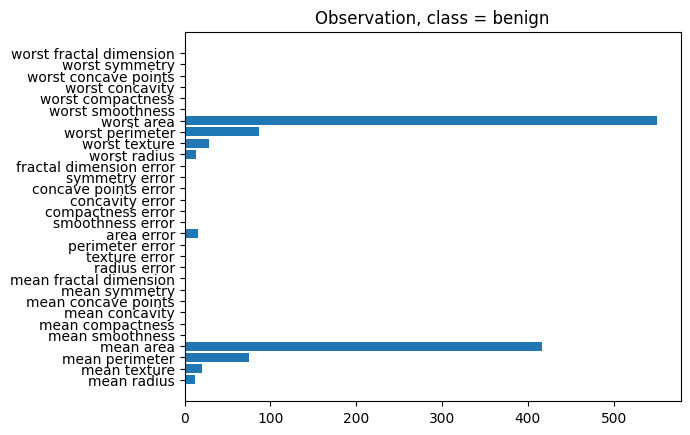

In [225]:

ylabeldata(ind, obs2.values[0], feature_names, "Observation, class = " + str(target_names[obsclass]))

/home/manuel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0]


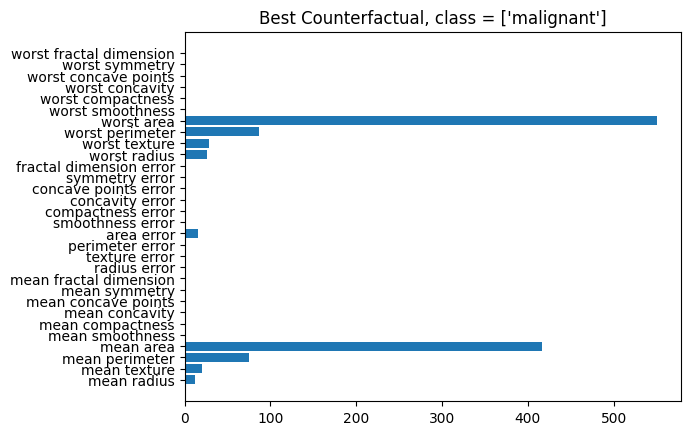

In [227]:
predenem = fittedRF.predict(best.reshape(1, -1))
print(predenem)
ylabeldata(ind, best, feature_names, "Best Counterfactual, class = " + str(target_names[predenem]))

In [228]:
print(distCF)

[[ 0.00000e+00  0.00000e+00  0.00000e+00 -5.88650e+01  0.00000e+00
   0.00000e+00  0.00000e+00 -1.39215e-02  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  -1.33200e-03  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  -9.76000e-01  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00 -1.09400e-02  0.00000e+00  0.00000e+00]]


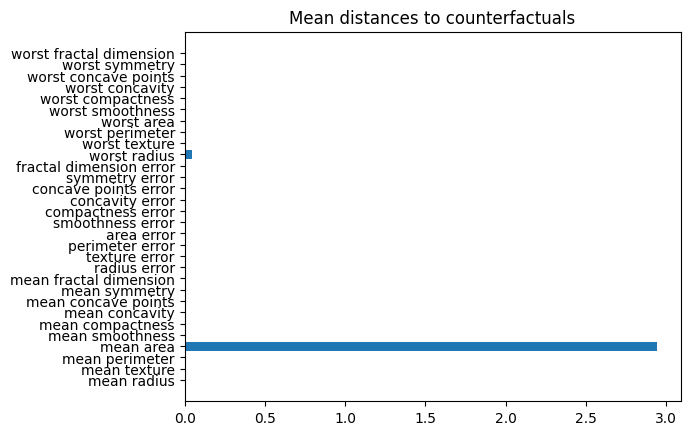

In [230]:
ylabeldata(ind, np.abs(distCF[0]/20), feature_names, "Mean distances to counterfactuals")

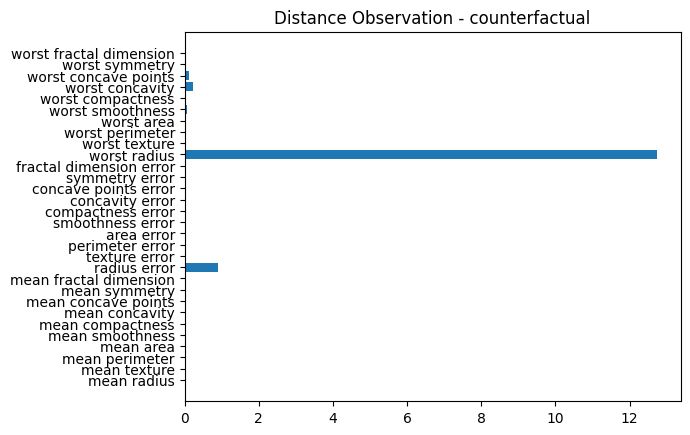

In [231]:
ylabeldata(ind, np.abs(obs2.values[0]- best), feature_names, "Distance Observation - counterfactual")